In [1]:

#%matplotlib widgets

import tkinter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
import IPython
#matplotlib.use('TkAgg')
#matplotlib.use('WebAgg')

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
from qiskit.providers.basic_provider import BasicProvider # instead of BasicAer
import Our_Qiskit_Functions as oq
import numpy as np
import math as m
import scipy as sci
import random
import time

from itertools import permutations
S_simulator = Aer.backends(name='statevector_simulator')[0]
%matplotlib ipympl
#%matplotlib notebook
#plt.rcParams['animation.html'] = 'jshtml'



In [2]:
Data = [ [1,1],[4,2],[5,5],[3,6] ]
D_min = [1000,0,0]
D2_min = [1000,0,0]
#----------------------------------------- Searches for centroids within 3 < x < 4 and 3 < y < 4
for j1 in np.arange(1000):
    X = 3.0 + j1/1000.0
    for j2 in np.arange(1000):
        Y = 3.0 + j2/1000.0
        D = 0
        D2 = 0
        for k in np.arange( len(Data) ):
            D = D + m.sqrt( (X-Data[k][0])**2 + (Y-Data[k][1])**2 )
            D2 = D2 + (X-Data[k][0])**2 + (Y-Data[k][1])**2
        if( D < D_min[0] ):
            D_min = [ D, X, Y ]
        if( D2 < D2_min[0] ):
            D2_min = [ D2, X, Y ]
#-----------------------------------------
print('Minimum Distance: ',round(D_min[0],2),' coordinates: (',D_min[1],D_min[2],')')
print('Minimum Distance Squared: ',round(D2_min[0],2),' coordinates: (',D2_min[1],D2_min[2],')')

Minimum Distance:  9.78  coordinates: ( 3.6 3.6 )
Minimum Distance Squared:  25.75  coordinates: ( 3.25 3.5 )


In [3]:
xs = 0
ys = 0
for x, y in Data:
    xs += x
    ys += y

xs /= len(Data)
ys /= len(Data)

print('Xc = ', xs, ' Yc = ', ys)

Xc =  3.25  Yc =  3.5


Clustering Complete:  8  Iterations


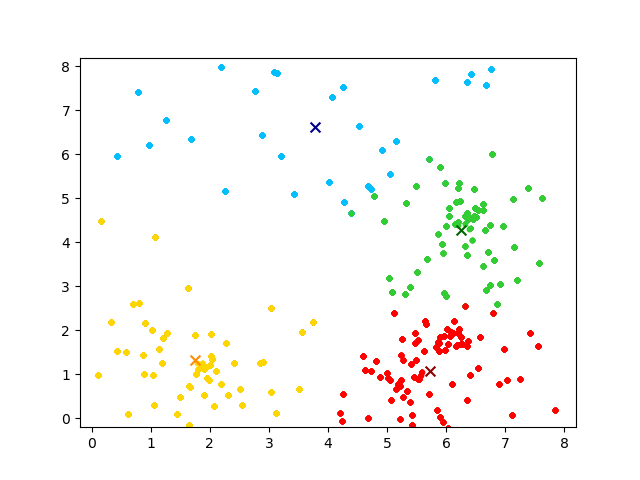

In [4]:


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis([-0.2,8.2,-0.2,8.2])
#fig.show()
colors = ['red','limegreen','deepskyblue','gold']
colors2 = ['darkred','darkgreen','darkblue','darkorange']
#--------------------------------------------------------
N = 240
k = 4
#--------------------------------------------------------
Data = oq.k_Data(k,N)
for d in np.arange(len( Data )):
    ax.scatter( Data[d][0], Data[d][1], color='black', s=10 )
fig.canvas.draw()
time.sleep(2)
#--------------------------------------------------------
Centroids = oq.Initial_Centroids( k, Data )
Clusters = []
Clusters,old_Clusters = oq.Update_Clusters( Data, Centroids, Clusters )
for c1 in np.arange(len(Clusters)):
    for c2 in np.arange( len( Clusters[c1] ) ):
        ax.scatter( Clusters[c1][c2][0],Clusters[c1][c2][1], color=colors[c1],s=10 )
    ax.scatter( Centroids[c1][0],Centroids[c1][1], color=colors2[c1], marker='x',s=50 )
    fig.canvas.draw()
    time.sleep(1)
time.sleep(2)
#--------------------------------------------------------
terminate = False
iters = 0
while( (terminate==False) and (iters<50) ):
    Centroids,old_Centroids = oq.Update_Centroids(Centroids, Clusters)
    Clusters,old_Clusters = oq.Update_Clusters( Data, Centroids, Clusters )
    oq.Draw_Data( Clusters, Centroids, old_Centroids, fig, ax, colors, colors2 )
    terminate = oq.Check_Termination( Clusters, old_Clusters )
    iters = iters + 1
print( 'Clustering Complete: ',iters,' Iterations' )


#fig.show()

In [5]:
a = QuantumRegister(1,name='a')
q = QuantumRegister(2,name='q')
qc= QuantumCircuit(a,q)
qc.h( a[0] )
qc.x( q[1] )
print('____ Before CSWAP ____')
oq.Wavefunction(qc, systems=[1,2])
qc.cswap( a[0], q[0], q[1] )
print('\n____ After CSWAP ____')
oq.Wavefunction(qc, systems=[1,2]);

____ Before CSWAP ____
0.70711  |0>|01>   0.70711  |1>|01>   

____ After CSWAP ____
0.70711  |1>|10>   0.70711  |0>|01>   


In [6]:
q = QuantumRegister(3,name='q')
c = ClassicalRegister(1,name='c')
qc= QuantumCircuit(q,c,name='qc')
qc.h( q[1] )
qc.x( q[2] )
qc.barrier()
#------------------------------ The SWAP Test
qc.h( q[0] )
qc.cswap( q[0], q[1], q[2] )
qc.h( q[0] )
qc.measure( q[0], c[0] )
#-------------------------------
oq.Measurement( qc,shots=10000, )
print(' ')
print(qc)

7484|0>   2516|1>   
 
           ░ ┌───┐   ┌───┐┌─┐
q_0: ──────░─┤ H ├─■─┤ H ├┤M├
     ┌───┐ ░ └───┘ │ └───┘└╥┘
q_1: ┤ H ├─░───────X───────╫─
     ├───┤ ░       │       ║ 
q_2: ┤ X ├─░───────X───────╫─
     └───┘ ░               ║ 
c: 1/══════════════════════╩═
                           0 


In [7]:
a = QuantumRegister( 1, name='a' )
q1 = QuantumRegister( 2, name='q1' )
q2 = QuantumRegister( 2, name='q2' )
c = ClassicalRegister( 1, name='c' )
qc = QuantumCircuit( a, q1, q2, c )
#=========================================
qc.h( q1[0] )
qc.h( q1[1] )
qc.x( q2[1] )
oq.Wavefunction( qc, systems=[1,2,2], show_systems=[False,True,True] )
qc.barrier()
#-------------------------------- 2-Qubit SWAP Test
qc.h( a[0] )
qc.cswap( a[0], q1[0], q2[0] )
qc.cswap( a[0], q1[1], q2[1] )
qc.h( a[0] )
qc.measure(a,c)
#--------------------------------
print('\n___ Measurement Probabilities on the Control Qubit ___')
oq.Measurement( qc, shots=8000 )
print(' ')
print(qc)

0.5  |00>|01>   0.5  |10>|01>   0.5  |01>|01>   0.5  |11>|01>   

___ Measurement Probabilities on the Control Qubit ___
5042|0>   2958|1>   
 
            ░ ┌───┐      ┌───┐┌─┐
   a: ──────░─┤ H ├─■──■─┤ H ├┤M├
      ┌───┐ ░ └───┘ │  │ └───┘└╥┘
q1_0: ┤ H ├─░───────X──┼───────╫─
      ├───┤ ░       │  │       ║ 
q1_1: ┤ H ├─░───────┼──X───────╫─
      └───┘ ░       │  │       ║ 
q2_0: ──────░───────X──┼───────╫─
      ┌───┐ ░          │       ║ 
q2_1: ┤ X ├─░──────────X───────╫─
      └───┘ ░                  ║ 
 c: 1/═════════════════════════╩═
                               0 


In [8]:
q = QuantumRegister(1)
qc= QuantumCircuit(q)
A = [ 3/5, 4/5 ]
qc.initialize( A, [q[0]] )
oq.Wavefunction( qc );

0.6  |0>   0.8  |1>   


In [9]:
print( qc.decompose().decompose().decompose() )

          ┌───────────────────────┐
q18: ─|0>─┤ multiplex1_reverse_dg ├
          └───────────────────────┘


In [10]:
A = [1,0,-2,0]
B = [6,-4,0,0]
trials = 50000
#==============================
A_norm = 0
B_norm = 0
D = 0
for i in np.arange(len(A)):
    A_norm = A_norm + A[i]**2
    B_norm = B_norm + B[i]**2
    D = D + (A[i]-B[i])**2
D = m.sqrt(D)
A_norm = m.sqrt(A_norm)
B_norm = m.sqrt(B_norm)
Z = round( A_norm**2 + B_norm**2 )
#------------------------------
phi_vec = [A_norm/m.sqrt(Z),-B_norm/m.sqrt(Z)]
psi_vec = []
for i in np.arange(len(A)):
    psi_vec.append( (A[i]/A_norm) /m.sqrt(2) )
    psi_vec.append( (B[i]/B_norm) /m.sqrt(2) )
#==============================
a = QuantumRegister(1,name='a')
q = QuantumRegister(4,name='q')
c = ClassicalRegister(1,name='c')
qc= QuantumCircuit(a,q,c)
qc.initialize( phi_vec, q[0] )
qc.initialize( psi_vec, q[1:4] )
#------------------------------ The SWAP Test
qc.h( a[0] )
qc.cswap( a[0], q[0], q[1] )
qc.h( a[0] )
qc.measure(a,c)
#------------------------------
M = oq.Measurement(qc,shots=trials,return_M=True,print_M=False)
print('Euclidean Distance: ',round(D,4))
print('\n DistCalc Distance: ',round( m.sqrt((((M['0']/trials - 0.5)/0.5)*2*Z)),4) );

Euclidean Distance:  6.7082

 DistCalc Distance:  6.7227


In [11]:
Shots = 10000
Points = [ [-1,1], [3,4], [7,7], [6,8] ]
Norm_Points = []
for p in np.arange( len(Points) ):
    Norm_Points.append( Points[p]/np.linalg.norm(Points[p]) )
#==================================================
for p2 in np.arange( len(Norm_Points)-1 ):
    q = QuantumRegister(3)
    c = ClassicalRegister(1)
    qc= QuantumCircuit(q,c)
    qc.initialize( Norm_Points[int(p2)], [q[1]] )
    qc.initialize( Norm_Points[-1], [q[2]] )
#--------------------------------------------------
    IP = oq.SWAP_Test( qc, q[0], q[1], q[2], c[0], Shots )
    print('\nComparing Points: ',Points[p2],' & ',Points[-1],'\n',IP,'|0> ',Shots-IP,'|1>')


Comparing Points:  [-1, 1]  &  [6, 8] 
 5090 |0>  4910 |1>

Comparing Points:  [3, 4]  &  [6, 8] 
 10000 |0>  0 |1>

Comparing Points:  [7, 7]  &  [6, 8] 
 9891 |0>  109 |1>


In [12]:
Shots = 10000
Points = [ [2,3], [4,6], [8,12], [12,18] ]
Norm_Points = []
for p in np.arange( len(Points) ):
    Norm_Points.append( Points[p]/np.linalg.norm(Points[p]) )
#==================================================
for p2 in np.arange( len(Norm_Points)-1 ):
    q = QuantumRegister(3)
    c = ClassicalRegister(1)
    qc= QuantumCircuit(q,c)
    qc.initialize( Norm_Points[int(p2)], [q[1]] )
    qc.initialize( Norm_Points[-1], [q[2]] )
#--------------------------------------------------
    IP = oq.SWAP_Test( qc, q[0], q[1], q[2], c[0], Shots )
    print('\nComparing Points: ',Points[p2],' & ',Points[-1],'\n',IP,'|0> ',Shots-IP,'|1>')


Comparing Points:  [2, 3]  &  [12, 18] 
 10000 |0>  0 |1>

Comparing Points:  [4, 6]  &  [12, 18] 
 10000 |0>  0 |1>

Comparing Points:  [8, 12]  &  [12, 18] 
 10000 |0>  0 |1>


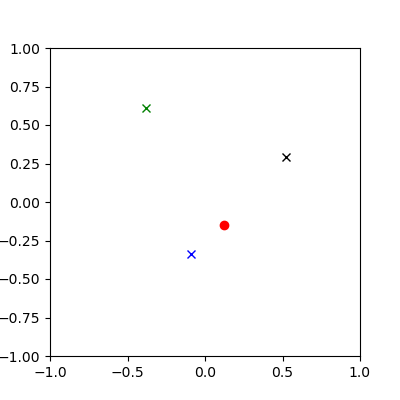

In [13]:
Point = [ 0.12, -0.15 ]
Centroids = [ [-0.38,0.61] , [-0.09,-0.34] , [0.52,0.29] ]
#-----------------------
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.axis([-1,1,-1,1])
#fig.show()
#-----------------------
plt.plot(Point[0], Point[1], 'ro')
markers = ['gx','bx','kx']
for c in np.arange( len(Centroids) ):
    plt.plot(Centroids[c][0], Centroids[c][1], markers[c])
fig.canvas.draw()

In [14]:
Shots = 10000
Point = [ 0.12, -0.15 ]
Centroids = [ [-0.38,0.61] , [-0.09,-0.34] , [0.52,0.29] ]
Bloch_Point = [ (Point[0]+1)*m.pi/2, (Point[1]+1)*m.pi/2 ]
Bloch_Cents = []
for c in np.arange( len(Centroids) ):
    Bloch_Cents.append( [ (Centroids[c][0]+1)*m.pi/2, (Centroids[c][1]+1)*m.pi/2 ] )
#====================================
colors = ['Green','Blue','Black']
for c2 in np.arange( len(Bloch_Cents) ):
    q = QuantumRegister(3)
    c = ClassicalRegister(1)
    qc= QuantumCircuit(q,c)
    qc.u( Bloch_Point[0], Bloch_Point[1], 0, [q[1]] )
    qc.u( Bloch_Cents[c2][0], Bloch_Cents[c2][1], 0, [q[2]] )
#--------------------------------------------------
    IP = oq.SWAP_Test( qc, q[0], q[1], q[2], c[0], Shots )
    print('\n\nComparing Points: ',Centroids[c2],' & ',Point,' (',colors[c2],' Centroid )\n\n',IP,'|0> ',Shots-IP,'|1>' )



Comparing Points:  [-0.38, 0.61]  &  [0.12, -0.15]  ( Green  Centroid )

 7974 |0>  2026 |1>


Comparing Points:  [-0.09, -0.34]  &  [0.12, -0.15]  ( Blue  Centroid )

 9771 |0>  229 |1>


Comparing Points:  [0.52, 0.29]  &  [0.12, -0.15]  ( Black  Centroid )

 9133 |0>  867 |1>


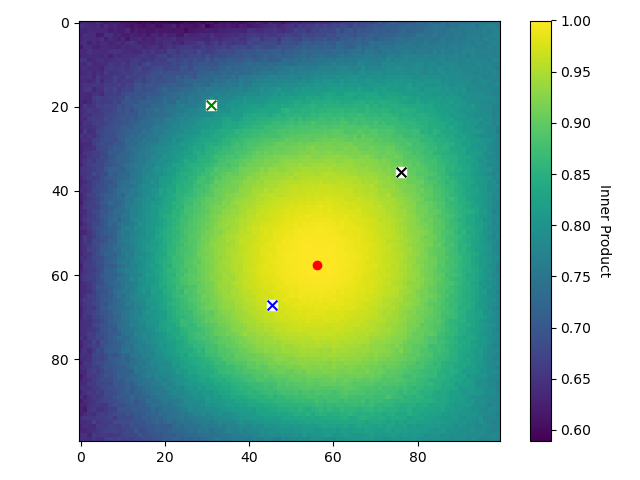

In [15]:
size = 100
Shots = 10000
Data_Space = [-1,1,-1,1]
Point = [0.12,-0.15] # Example Point
#Point = [-0.6,0.]
#Point = [0,-0.6]
#Point = [-0.9,0.]
#Point = [0,-0.9]
t = (Point[0]+1)*m.pi/2
p = (Point[1]+1)*m.pi/2
OL_grid = np.zeros(shape=(size,size))
#========================================================
for x in np.arange(size):
    t2 = (( (-1 + 2*(x/size)) + 1) * m.pi / 2)
    for y in np.arange(size):
        p2 = (( (-1 + 2*(y/size)) + 1) * m.pi / 2)
#---------------------------------
        q = QuantumRegister( 3, name='q' )
        c = ClassicalRegister( 1, name='c' )
        qc= QuantumCircuit( q,c, name='qc' )
        qc.u( t, p, 0, q[1] )
        qc.u( t2, p2, 0, q[2] )
#---------------------------------
        IP = oq.SWAP_Test( qc, q[0], q[1], q[2], c[0], Shots )
        if( IP < 5000 ):
            IP = 5000
        OL_grid[int(size-y-1),int(x)] = m.sqrt((1.0*IP/Shots-0.5)*2)
#========================================================
fig, ax = plt.subplots()
show_ticks = False
show_text = False
oq.Heatmap(OL_grid, show_text, show_ticks, ax, "viridis", "Inner Product")
plt.plot((Point[0]+1)*size/2, size-(((Point[1]+1))*size/2), 'ro')
Centroids = [ [-0.38,0.61] , [-0.09,-0.34] , [0.52,0.29] ]
colors = ['green','blue','black']
for c in np.arange(len(Centroids)):
    plt.scatter((Centroids[c][0]+1)*size/2, size-((Centroids[c][1]+1)*size/2), color='white', marker='s', s=50)
    plt.scatter((Centroids[c][0]+1)*size/2, size-((Centroids[c][1]+1)*size/2), color=colors[c], marker='x', s=50)
fig.tight_layout()
#plt.show()

In [16]:
Shots = 10000
Point = [2*random.random()-1,2*random.random()-1]
t = (Point[0]+1)*m.pi/2
p = (Point[1]+1)*m.pi/2
#========================================================
q = QuantumRegister( 3, name='q' )
c = ClassicalRegister( 1, name='c' )
qc= QuantumCircuit( q,c, name='qc' )
qc.u( t, p, 0, q[1] )
qc.u( m.pi-t, p+m.pi, 0, q[2] )
#---------------------------------
IP = oq.SWAP_Test( qc, q[0], q[1], q[2], c[0], Shots )
print('Inner Product Result Bewteen: [',round(t,3),' ,',round(p,3),'] & [',round(m.pi-t,3),' ,',round(p+m.pi,3),']    (θ,Φ) & (π-θ,π+Φ)')
print('\n',IP,' |0>')

Inner Product Result Bewteen: [ 0.374  , 1.1 ] & [ 2.767  , 4.241 ]    (θ,Φ) & (π-θ,π+Φ)

 4963  |0>


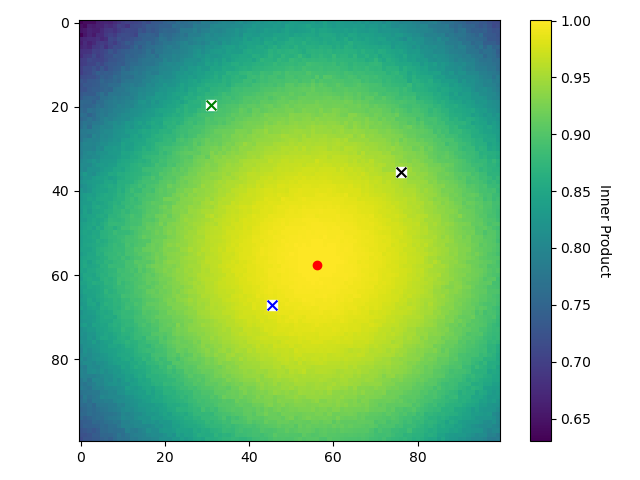

In [17]:
size = 100
#-------------------------------------------------------
Data_Space = [-1,1,-1,1]
Point = [0.12,-0.15] # Example Point
t,p = oq.Bloch_State( Point, Data_Space )
#-------------------------------------------------------
OL_grid = np.zeros(shape=(size,size))
#========================================================
for x in np.arange(size):
    Xp = Data_Space[0] + (x/size)*(Data_Space[1]-Data_Space[0])
    for y in np.arange(size):
        Yp = Data_Space[2] + (y/size)*(Data_Space[3]-Data_Space[2])
        t2,p2 = oq.Bloch_State( [Xp,Yp], Data_Space )
#-----------------------------
        q = QuantumRegister( 3, name='q' )
        c = ClassicalRegister( 1, name='c' )
        qc= QuantumCircuit( q,c, name='qc' )
        qc.u( t, p, 0, q[1] )
        qc.u( t2, p2, 0, q[2] )
#-------------
        IP = oq.SWAP_Test( qc, q[0], q[1], q[2], c[0], Shots )
        if( IP < 5000 ):
            IP = 5000
        OL_grid[int(size-y-1),int(x)] = m.sqrt((1.0*IP/Shots-0.5)*2)
#========================================================
fig, ax = plt.subplots()
show_ticks = False
show_text = False
oq.Heatmap(OL_grid, show_text, show_ticks, ax, "viridis", "Inner Product")
plt.plot((Point[0]-Data_Space[0])*size/(Data_Space[1]-Data_Space[0]), (Data_Space[3]-Point[1])*size/(Data_Space[3]-Data_Space[2]), 'ro')
Centroids = [ [-0.38,0.61] , [-0.09,-0.34] , [0.52,0.29] ]
colors = ['green','blue','black']
for c in np.arange(len(Centroids)):
    plt.scatter((Centroids[c][0]+1)*size/2, size-((Centroids[c][1]+1)*size/2), color='white', marker='s', s=50)
    plt.scatter((Centroids[c][0]+1)*size/2, size-((Centroids[c][1]+1)*size/2), color=colors[c], marker='x', s=50)
fig.tight_layout()
plt.show()

Clustering Complete:  50  Iterations


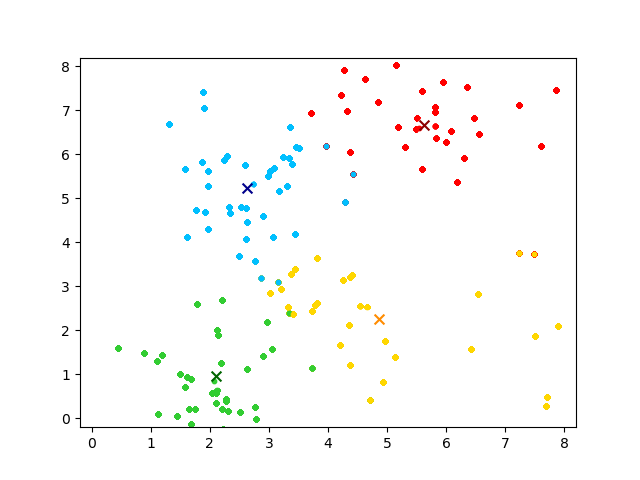

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis([-0.2,8.2,-0.2,8.2])
#fig.show()
colors = ['red','limegreen','deepskyblue','gold']
colors2 = ['darkred','darkgreen','darkblue','darkorange']
#--------------------------------------------------------
n = 140
k = 4
shots = 500
Data_Space = [0,8,0,8]
#--------------------------------------------------------
Data = oq.k_Data(k,n)
for d in np.arange(len( Data )):
    ax.scatter( Data[d][0], Data[d][1], color='black', s=10 )
fig.canvas.draw()
time.sleep(2)
#--------------------------------------------------------
Centroids = oq.Initial_Centroids( k, Data )
Clusters = []
Clusters,old_Clusters = oq.Q_Update_Clusters( Data, Centroids, Clusters, Data_Space, shots )
for c1 in np.arange(len(Clusters)):
    for c2 in np.arange( len( Clusters[c1] ) ):
        ax.scatter( Clusters[c1][c2][0],Clusters[c1][c2][1], color=colors[c1],s=10 )
    ax.scatter( Centroids[c1][0],Centroids[c1][1], color=colors2[c1], marker='x',s=50 )
    fig.canvas.draw()
    time.sleep(1)
time.sleep(2)
#--------------------------------------------------------
terminate = False
iters = 0
while( (terminate==False) and (iters<50) ):
    Centroids,old_Centroids = oq.Update_Centroids(Centroids, Clusters)
    Clusters,old_Clusters = oq.Q_Update_Clusters( Data, Centroids, Clusters, Data_Space, shots )
    oq.Draw_Data( Clusters, Centroids, old_Centroids, fig, ax, colors, colors2 )
    terminate = oq.Check_Termination( Clusters, old_Clusters )
    iters = iters + 1
print( 'Clustering Complete: ',iters,' Iterations' )